In [1]:
import thinkdsp as td
signal= td.PinkNoise(beta=1)
wave= signal.make_wave(duration=5,framerate=10000)


In [4]:
import numpy as np
import scipy as sp

def myzzz(sig,zamp):
    test= sig.ys / np.max(sig.ys)
    test2= sp.fftpack.dct(test, type=2)
    test2= [it for it in test2 if abs(it**2)<zamp**2]
    zzz= sp.fftpack.idct(test2, type=1)
    zzz= zzz / np.max(zzz)
    ts = np.linspace(0,1,sig.framerate)*sig.duration
    N = len(zzz)
    fs = np.arange(N)
    args= np.outer(ts, fs)
    M=    np.cos(2*np.pi*args)
    ys=   np.dot(M, zzz)
    w=    td.Wave(ys)
    return w

In [10]:
sig= wave
zamp= np.exp(5)

test= sig.ys / np.max(sig.ys)
test2= sp.fftpack.dct(test, type=2)

In [12]:
test2.shape

(50000,)

In [16]:
x=  test2
dx= np.diff(x)
x.size, dx.size

(50000, 49999)

In [29]:
I= abs(dx)>zamp
y= x[1:][I]
y

array([  329.50970377, -2058.98151193,  -506.82511052, ...,
          65.89053406,    86.35229612,   -62.91991641])

In [30]:
z= sp.fftpack.idct(y, type=2)
z

array([-54873.29710891, -56007.1181824 , -42380.86542786, ...,
       -65288.08003531, -39959.82458305, -42517.10643542])

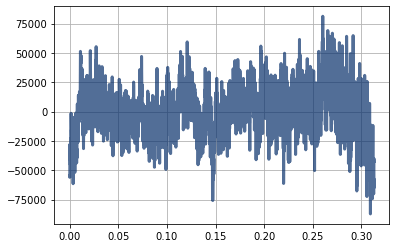

In [32]:
wz= td.Wave(z)
wz.plot()

In [9]:
test2= [it for it in test2 if abs(it**2)<zamp**2]

zzz= sp.fftpack.idct(test2, type=1)

zzz= zzz / np.max(zzz)
ts = np.linspace(0,1,sig.framerate)*sig.duration
N = len(zzz)
fs = np.arange(N)
args= np.outer(ts, fs)
M=    np.cos(2*np.pi*args)
ys=   np.dot(M, zzz)
w=    td.Wave(ys)

w

In [5]:
ppp= myzzz(wave,np.exp(5))
ppp.make_audio()

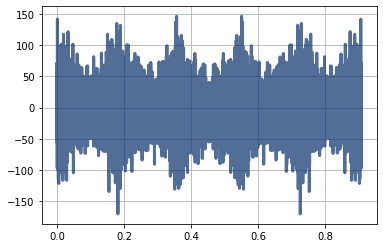

In [8]:
ppp.plot()

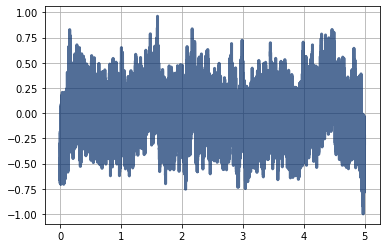

In [7]:
wave.plot()